# Visualizing fundamental analysis indicators for NASDAQ companies


## Company revenue graph using Python

---

There are two main types of stock market analysis: technical analysis, and fundamental analysis. The former is what you may be more familiar with: the task of the technical analysis is to predict the future prices of a stock given its historical values and volume. On the other hand, the aim of the fundamental analysis is to determine "real" or "fair market" value of the stock, given company's financial condition, it's assets, market potential, etc.

For the more detailed definitions, see the excerpt from the [Investopedia article](https://www.investopedia.com/terms/f/fundamentalanalysis.asp) below:

> Fundamental analysis (FA) is a method of measuring a security's intrinsic value by examining related economic and financial factors. Fundamental analysts study anything that can affect the security's value, from macroeconomic factors such as the state of the economy and industry conditions to microeconomic factors like the effectiveness of the company's management.
>
> ...
>
> This method of stock analysis is considered to be in contrast to technical analysis, which forecasts the direction of prices through an analysis of historical market data such as price and volume. 
>
> ...
>
> * Fundamental analysis is a method of determining a stock's real or "fair market" value.
> * Fundamental analysts search for stocks that are currently trading at prices that are higher or lower than their real value.
> * If the fair market value is higher than the market price, the stock is deemed to be undervalued and a buy recommendation is given.
> * In contrast, technical analysts ignore the fundamentals in favor of studying the historical price trends of the stock.

Source: [Investopedia definition](https://www.investopedia.com/terms/f/fundamentalanalysis.asp)

---

In this Jupyter Notebook we will visualize fundamental analysis indicator data in Python. We will focus on the company revenue data, which we will obtain from the NASDAQ data portal ([data.nasdaq.com/databases/SF1/data](https://data.nasdaq.com/databases/SF1/data)).

## How to get the data

How to get fundamental analysis indicator NASDAQ data?

1. Create an account here: https://data.nasdaq.com/sign-up

2. Log in to: https://data.nasdaq.com/login

3. Go to Shradar's `Core US Fundamentals`: https://data.nasdaq.com/databases/SF1/data

4. Download the `Core US Fundamentals` dataset (`SHARADAR/SF1`) as CSV: https://data.nasdaq.com/tables/SF1/SHARADAR-SF1

### Supplementary materials

The documentation on the fundamental analysis indicators (factors) data: [https://data.nasdaq.com/databases/SF1/documentation](https://data.nasdaq.com/databases/SF1/documentation).

**[Important] Indication description**: https://data.nasdaq.com/tables/SF1/SHARADAR-INDICATORS (as a matter of fact, it is one of the tables available at: https://data.nasdaq.com/databases/SF1/data).

---

Now that you have downloaded the data, we will load it, and then we will display some time-course fundamental analysis data.

First, let's import the two Python modules that we will need - Pandas and Matplotlib:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

Then we can load the data (using pandas):

In [2]:
data = pd.read_csv('SHARADAR-SF1.csv')
data

,ticker,dimension,calendardate,datekey,reportperiod,lastupdated,accoci,assets,assetsavg,assetsc,...,sharesbas,shareswa,shareswadil,sps,tangibles,taxassets,taxexp,taxliabilities,tbvps,workingcapital
0,XOM,MRY,2018-12-31,2018-12-31,2018-12-31,2022-05-21,-19564000000,346196000000,349610000000,4.797300e+10,...,4233807170,4233807170,NaN,68.546,346196000000,0,9532000000,29856000000,81.769,-9.165000e+09
1,XOM,MRY,2017-12-31,2017-12-31,2017-12-31,2022-05-21,-16262000000,348691000000,346334750000,4.713400e+10,...,4237106077,4237106077,NaN,57.672,348691000000,0,-1174000000,29938000000,82.295,-1.063700e+10
2,XOM,MRY,2016-12-31,2016-12-31,2016-12-31,2022-05-21,-22239000000,330314000000,338740500000,4.141600e+10,...,4146693326,4146693326,NaN,50.188,330314000000,0,-406000000,36656000000,79.657,-6.222000e+09
3,XOM,MRY,2015-12-31,2015-12-31,2015-12-31,2022-05-21,-23511000000,336758000000,342160250000,4.262300e+10,...,4162938512,4162938512,NaN,59.873,336758000000,0,5415000000,39620000000,80.894,-1.135300e+10
4,XOM,MRY,2014-12-31,2014-12-31,2014-12-31,2022-05-21,-18957000000,349493000000,353469000000,5.291000e+10,...,4234528643,4234528643,NaN,97.281,349493000000,0,18015000000,44168000000,82.534,-1.172300e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,AAPL,MRY,2015-12-31,2015-09-26,2015-09-26,2022-04-29,-345000000,290345000000,271646000000,8.937800e+10,...,22810888000,23013684000,2.317228e+10,10.155,281336000000,0,19121000000,0,12.225,8.768000e+09
236,AAPL,MRY,2014-12-31,2014-09-27,2014-09-27,2022-04-29,1082000000,231839000000,221383000000,6.853100e+10,...,23951468000,24342288000,2.449065e+10,7.509,223081000000,4318000000,13973000000,0,9.164,5.083000e+09
237,AAPL,MRY,2013-12-31,2013-09-28,2013-09-28,2022-04-29,-471000000,207000000000,199421750000,7.328600e+10,...,25437916000,25909280000,2.608654e+10,6.596,201244000000,3453000000,13118000000,0,7.767,2.962800e+10
238,AAPL,MRY,2012-12-31,2012-09-29,2012-09-29,2022-04-29,499000000,176064000000,157143750000,5.765300e+10,...,26247368000,26174904000,2.646993e+10,5.979,170705000000,2583000000,14030000000,0,6.522,1.911100e+10


Now, to go deeper into some technicalities - we need to get Pandas' `dateTimeIndex` from the `calendardate` column.

In [3]:
# Get pandas' dateTimeIndex from the `calendardate` column.
# In order to do that we need to specify date format.
data.index = pd.to_datetime(data['calendardate'], format="%Y/%m/%d")

# Set this option to show all rows of the data frame.
#pd.set_option('display.max_rows', None)

# Display the data in Jupyter output cell
data

,ticker,dimension,calendardate,datekey,reportperiod,lastupdated,accoci,assets,assetsavg,assetsc,...,sharesbas,shareswa,shareswadil,sps,tangibles,taxassets,taxexp,taxliabilities,tbvps,workingcapital
calendardate,,,,,,,,,,,,,,,,,,,,,
2018-12-31,XOM,MRY,2018-12-31,2018-12-31,2018-12-31,2022-05-21,-19564000000,346196000000,349610000000,4.797300e+10,...,4233807170,4233807170,NaN,68.546,346196000000,0,9532000000,29856000000,81.769,-9.165000e+09
2017-12-31,XOM,MRY,2017-12-31,2017-12-31,2017-12-31,2022-05-21,-16262000000,348691000000,346334750000,4.713400e+10,...,4237106077,4237106077,NaN,57.672,348691000000,0,-1174000000,29938000000,82.295,-1.063700e+10
2016-12-31,XOM,MRY,2016-12-31,2016-12-31,2016-12-31,2022-05-21,-22239000000,330314000000,338740500000,4.141600e+10,...,4146693326,4146693326,NaN,50.188,330314000000,0,-406000000,36656000000,79.657,-6.222000e+09
2015-12-31,XOM,MRY,2015-12-31,2015-12-31,2015-12-31,2022-05-21,-23511000000,336758000000,342160250000,4.262300e+10,...,4162938512,4162938512,NaN,59.873,336758000000,0,5415000000,39620000000,80.894,-1.135300e+10
2014-12-31,XOM,MRY,2014-12-31,2014-12-31,2014-12-31,2022-05-21,-18957000000,349493000000,353469000000,5.291000e+10,...,4234528643,4234528643,NaN,97.281,349493000000,0,18015000000,44168000000,82.534,-1.172300e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-12-31,AAPL,MRY,2015-12-31,2015-09-26,2015-09-26,2022-04-29,-345000000,290345000000,271646000000,8.937800e+10,...,22810888000,23013684000,2.317228e+10,10.155,281336000000,0,19121000000,0,12.225,8.768000e+09
2014-12-31,AAPL,MRY,2014-12-31,2014-09-27,2014-09-27,2022-04-29,1082000000,231839000000,221383000000,6.853100e+10,...,23951468000,24342288000,2.449065e+10,7.509,223081000000,4318000000,13973000000,0,9.164,5.083000e+09
2013-12-31,AAPL,MRY,2013-12-31,2013-09-28,2013-09-28,2022-04-29,-471000000,207000000000,199421750000,7.328600e+10,...,25437916000,25909280000,2.608654e+10,6.596,201244000000,3453000000,13118000000,0,7.767,2.962800e+10


A quick view on the indicators:

In [4]:
# We display the Indicators data, and we find the indicator of interest.
indicators = pd.read_csv('SHARADAR-INDICATORS.csv')

# Set this option to show all rows of the data frame.
#pd.set_option('display.max_rows', None)

# Display the data in Jupyter output cell
indicators

,table,indicator,isfilter,isprimarykey,title,description,unittype
0,SF1,revenue,N,N,Revenues,[Income Statement] Amount of Revenue recognize...,currency
1,SF1,cor,N,N,Cost of Revenue,[Income Statement] The aggregate cost of goods...,currency
2,SF1,sgna,N,N,Selling General and Administrative Expense,[Income Statement] A component of [OpEx] repre...,currency
3,SF1,rnd,N,N,Research and Development Expense,[Income Statement] A component of [OpEx] repre...,currency
4,SF1,opex,N,N,Operating Expenses,[Income Statement] Operating expenses represen...,currency
...,...,...,...,...,...,...,...
331,TICKERS,lastpricedate,N,N,Last Price Date,The most recent price observation available.,date (YYYY-MM-DD)
332,TICKERS,firstquarter,N,N,First Quarter,The first financial quarter available in the d...,date (YYYY-MM-DD)
333,TICKERS,lastquarter,N,N,Last Quarter,The last financial quarter available in the da...,date (YYYY-MM-DD)
334,TICKERS,secfilings,N,N,SEC Filings URL,The URL pointing to the SEC filings which also...,text


## Plotting the data

Now we can plot the time-series revenue data for, let's say: two different NASDAQ companies.

Please note that the numbers on the Y-axis are presented in scientific notation. I.e., 2.6*10^11 means: \$260.0 billion, i.e., USD 260,000,000,000.

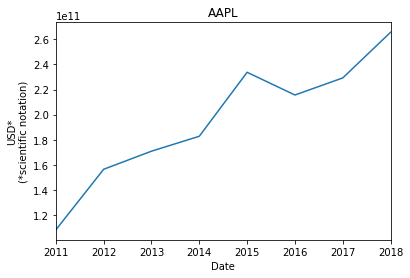

In [5]:
company_one = 'AAPL'

plt.title(company_one)
data[data['ticker']==company_one]['revenue'].plot()

plt.xlabel('Date')
plt.ylabel('USD*\n(*scientific notation)')
plt.show()

For comparison, we will also plot revenues of the other company - IBM:

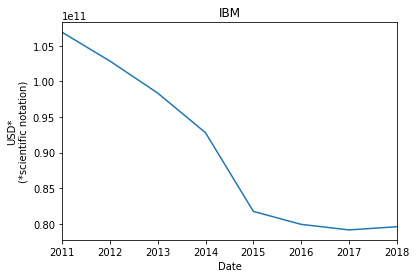

In [6]:
company_two = 'IBM'

plt.title(company_two)
data[data['ticker']==company_two]['revenue'].plot()

plt.xlabel('Date')
plt.ylabel('USD*\n(*scientific notation)')
plt.show()

And that's it, I hope you liked this very simple example.